## scikit-learn中的高斯核函数
> **高斯函数中，u决定对称轴的位置， a决定对称轴的大小**

> **<font color='red'>不同的gamma值，不同的分布</font>，小的gamma欠拟合， 大的gamma过拟合**

<img src='./picture/8-1.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

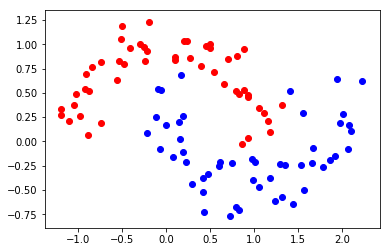

In [2]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.show()

In [4]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) *100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) *100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap  = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)

## 使用rbf核

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC',SVC(kernel='rbf', gamma=gamma))
    ])

In [5]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


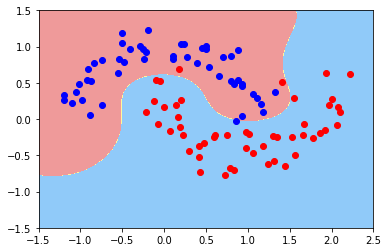

In [6]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()

## 使用不同的gamma值
> **大的gamma分布很窄**

> **小的gamma分布很宽**

In [7]:
svc = RBFKernelSVC(gamma=100.0)
svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


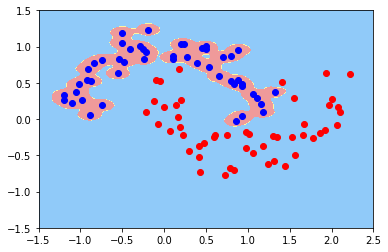

In [8]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


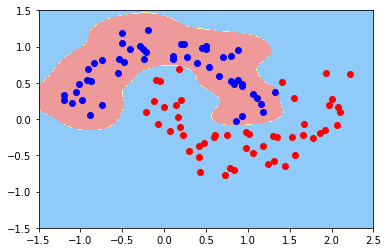

In [10]:
svc = RBFKernelSVC(gamma=10.0)
svc.fit(X, y)
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


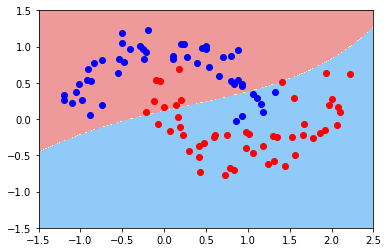

In [11]:
svc = RBFKernelSVC(gamma=0.1)
svc.fit(X, y)
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()